In [43]:
import ast
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
from os import getenv
from openai import OpenAI
import pathlib
import textwrap
import google.generativeai as genai
import time

load_dotenv("../.env",override=True)
GOOGLE_API_KEY = getenv("GEMINI_API_KEY")
OPENAI_API_KEY = getenv("OPENAI_API_KEY")


sample_df = pd.read_csv("./output/sample_df_industry_level_embeddings.csv")
sample_df['openai_embedding_entire'] = sample_df['openai_embedding_entire'].apply(ast.literal_eval)
sample_df = sample_df.dropna(subset=['parsed_description'])
sample_df.head()

,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,...,description_all,industries_parsed,generated_description,openai_embedding,Company,parsed_description,Tasks/Jobs,Industry,People Using Tool,openai_embedding_entire
0,22341,Fytted,1-10,2024-03-01,—,—,"Venice, California, United States","SaaS, Mobile App, AI, Fashion",—,90292,...,"— SaaS, Mobile App, AI, Fashion",[],Fytted is a SaaS and mobile app that leverages...,"[-0.026910386979579926, 0.00429302453994751, -...",Fytted,"\nTasks/Jobs: Fashion recommendations, Virtual...","Fashion recommendations, Virtual fitting, Styl...",Fashion,"Shoppers, Consumers","[-0.04178014397621155, -0.020127102732658386, ..."
1,18944,Semilla Co. (Flou / Seed Academy),1-10,2023-02-01,"Semilla Co. (""Seed"") is building the future of...","Consumer Software, Content Creators, EdTech, L...","Fort Lauderdale, Florida, United States",Building the future of the music and entertain...,"43,978",33316,...,"Semilla Co. (""Seed"") is building the future of...","['Consumer Software', 'Content Creators', 'EdT...","Semilla Co., through its two products - Seed A...","[-0.024784477427601814, -0.007316365372389555,...",Semilla Co. (Flou / Seed Academy),"\nTasks/Jobs: Music Business Management, Marke...","Music Business Management, Marketing, Business...",Music Industry,"Music Creators, Entrepreneurs","[-0.004338318016380072, -0.021966977044939995,..."
2,19082,ChatGPT Nederlands - GPTNederlands.com,1-10,2023-02-03,GPTNederlands.com is dé toonaangevende bestemm...,—,—,GPTNederlands.com is dé toonaangevende bestemm...,"1,885,621",—,...,GPTNederlands.com is dé toonaangevende bestemm...,[],ChatGPT Nederlands - GPTNederlands.com is a le...,"[-0.04201542213559151, -0.02567780390381813, -...",ChatGPT Nederlands - GPTNederlands.com,"\nTasks/Jobs: Language translation, Content ge...","Language translation, Content generation, Cust...",Language AI,"Dutch speakers, Anyone","[-0.0312783420085907, -0.01716475374996662, -0..."
3,17578,Pelles.ai,1-10,2023-01-01,"Pelles.ai transforms the way MEP (mechanical, ...","Construction, SaaS, Software","New York, New York, United States",Auto-Generate MEP Design,"62,705",—,...,"Pelles.ai transforms the way MEP (mechanical, ...","['Construction', 'SaaS', 'Software']",Pelles.ai is an innovative platform that utili...,"[-0.026539845392107964, -0.014325139112770557,...",Pelles.ai,"\nTasks/Jobs: MEP plan generation, Clash detec...","MEP plan generation, Clash detection, Design o...",Construction,"Architects, Engineers","[-0.021538328379392624, -0.010536273941397667,..."
4,22004,SimLoop AI,1-10,2024-01-02,SimLoop allows companies run experiments with ...,"Analytics, Artificial Intelligence (AI), Gener...",—,User testing platform powered by simulated users,"360,457",—,...,SimLoop allows companies run experiments with ...,"['Analytics', 'Generative AI']",SimLoop AI is an innovative platform that enab...,"[-0.04071200266480446, -0.009665796533226967, ...",SimLoop AI,"\nTasks/Jobs: Website testing, User interactio...","Website testing, User interaction simulation, ...",Website optimization,"Developers, Marketers","[-0.025433985516428947, -0.021480992436408997,..."


In [125]:
sample_df.Industry.unique()

array(['Music Industry', 'Music', 'Music technology', 'Music creation',
       'Music production ', 'Content creation', 'Podcast discovery',
       'Music production', 'Language AI', 'Business automation',
       'AI language model', 'AI Solutions', 'AI platform',
       'Conversational AI', ' AI Development', 'IT Services',
       'No-code AI platform', 'AI Services', 'AI development platform',
       'Construction', 'Legal tech', 'Website optimization',
       'Moving and relocation', 'Website analytics', 'Software Testing',
       'Website migration', 'Domain name registration and management',
       'AI Research', 'Database management', 'Consumer goods',
       'Software development', 'AI information and guidance',
       'Artificial Intelligence', 'Search Engine', 'Knowledge Management',
       'Information management',
       'Artificial Intelligence Research & Development',
       'AI Training Data', 'AI tools discovery', 'AI/ML/DL development',
       'AI Marketplace', 'Informa

In [126]:
# sample_df['openai_embedding_industry'] = sample_df["Industry"].apply(lambda text: x.get_embedding(text))



In [133]:
sample_df["task_list"] = sample_df["Tasks/Jobs"].apply(lambda x: x.split(","))
task_df = sample_df.explode('task_list')


0         Music Business Management
0                         Marketing
0                 Business Strategy
0                  Music Production
1                  Music production
                   ...             
466          Application deployment
467         GPU resource allocation
467           Access to unused GPUs
467     Distributed computing tasks
467      High-performance computing
Name: task_list, Length: 1872, dtype: object

In [141]:
list(sample_df.task_list)

[['Music Business Management',
  ' Marketing',
  ' Business Strategy',
  ' Music Production'],
 ['Music production', ' Songwriting', ' Marketing', ' Promotion'],
 ['Music analysis',
  ' Playlist creation',
  ' Music discovery',
  ' Audience profiling'],
 ['Song composition',
  ' Music production',
  ' Lyrics generation',
  ' Music exploration'],
 ['Music generation', ' Sound design', ' Audio mixing', ' Mastering '],
 ['Music creation',
  ' Music collaboration',
  ' Gig booking',
  ' Music discovery'],
 ['Content creation',
  ' Voiceover production',
  ' Audiobook creation',
  ' Monetization '],
 ['Article generation',
  ' Image creation',
  ' Voiceover generation',
  ' Content creation'],
 ['Podcast discovery',
  ' Content curation',
  ' Recommendation engine',
  ' Personalized listening experience '],
 ['Content creation',
  ' Audio transcription',
  ' Video summarization',
  ' Voiceover generation '],
 ['Vocal sample licensing',
  ' Sound design',
  ' Music production',
  ' Revenue g

In [139]:
list(task_df.task_list)

['Music Business Management',
 ' Marketing',
 ' Business Strategy',
 ' Music Production',
 'Music production',
 ' Songwriting',
 ' Marketing',
 ' Promotion',
 'Music analysis',
 ' Playlist creation',
 ' Music discovery',
 ' Audience profiling',
 'Song composition',
 ' Music production',
 ' Lyrics generation',
 ' Music exploration',
 'Music generation',
 ' Sound design',
 ' Audio mixing',
 ' Mastering ',
 'Music creation',
 ' Music collaboration',
 ' Gig booking',
 ' Music discovery',
 'Content creation',
 ' Voiceover production',
 ' Audiobook creation',
 ' Monetization ',
 'Article generation',
 ' Image creation',
 ' Voiceover generation',
 ' Content creation',
 'Podcast discovery',
 ' Content curation',
 ' Recommendation engine',
 ' Personalized listening experience ',
 'Content creation',
 ' Audio transcription',
 ' Video summarization',
 ' Voiceover generation ',
 'Vocal sample licensing',
 ' Sound design',
 ' Music production',
 ' Revenue generation',
 'Language translation',
 ' Co

In [138]:
pd.DataFrame(task_df.task_list.value_counts())

,count
task_list,
Data analysis,38
Content creation,17
Content creation,17
Data analysis,15
Risk assessment,11
...,...
Property management,1
Keyless entry,1
Guest access management,1


In [12]:
# genai.configure(api_key=GOOGLE_API_KEY)
# class gemini():
#     def __init__(self):
#         self.model = genai.GenerativeModel('gemini-1.5-flash')
#     def ask(self,prompt):
#         response = self.model.generate_content(prompt)
#         print(response)
#         if response.candidates[0].finish_reason == 3: return "N/A"
#         response = response.candidates[0].content.parts[0].text
#         return response

# x = gemini()
# x.ask("hi")


In [177]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'sample_df' and its 'openai_embedding_entire' column exist and contain appropriate data
embeddings = np.array(sample_df['openai_embedding_industry'].tolist())

similarity_matrix = cosine_similarity(embeddings)
distance_matrix = 1 - similarity_matrix

# Define the number of neighbors
n_neighbors = 7

# Create a KNN model for connectivity based on cosine distance
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn.fit(embeddings)
connectivity_matrix = knn.kneighbors_graph(embeddings, mode='connectivity')

# Use Spectral Clustering with the connectivity matrix defined by KNN
clustering = SpectralClustering(n_clusters=40, affinity='precomputed', assign_labels='kmeans', random_state=42)
cluster_labels = clustering.fit_predict(connectivity_matrix)

# Assign cluster labels back to the original DataFrame
sample_df['cluster_label'] = cluster_labels


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning:

Array is not symmetric, and will be converted to symmetric by average with its transpose.



In [244]:
for i in range(10):
    num_companies = len(sample_df[sample_df["cluster_label"] == i])
    print(f"Cluster {i}, Number of companies: {num_companies}")

Cluster 0, Number of companies: 14
Cluster 1, Number of companies: 17
Cluster 2, Number of companies: 13
Cluster 3, Number of companies: 16
Cluster 4, Number of companies: 13
Cluster 5, Number of companies: 18
Cluster 6, Number of companies: 14
Cluster 7, Number of companies: 13
Cluster 8, Number of companies: 15
Cluster 9, Number of companies: 14


In [243]:
for i in range(0,10):
    print(f"Processing {i}:\n************************\n")
    vals = sample_df[sample_df["cluster_label"]==i][["organization name","generated_description","parsed_description"]]
    for index, row in vals.iterrows():
        print(f"Organization Name: {row['organization name']}")
        print(f"Generated Description: {row['generated_description']}")
        print(f"Generated Description: {row['parsed_description']}\n")
    print(f"************************\n\n")

Processing 0:
************************

Organization Name: fyby.io
Generated Description: Fyby.io is an AI-powered marketplace that assists businesses in discovering, purchasing, and managing software, tech services, and bundled solutions. It streamlines the procurement process by providing a data-driven platform for SaaS products and tech-related service solutions.
Generated Description: 
Tasks/Jobs: Software discovery, Software procurement, Software management, Service discovery
Industry: SaaS Marketplace
People Using Tool: Businesses, IT managers
 


Organization Name: SafetyKit
Generated Description: SafetyKit is an AI-powered platform that streamlines Trust and Safety operations, enabling teams to efficiently manage reviews, enforcement, and appeals without the need for additional manpower. Developed by former Airbnb, Meta, and Stripe executives, SafetyKit aims to expedite decision-making processes and improve compliance, onboarding, and supportability reviews.
Generated Descripti

In [180]:
if "Industry Cluster" in sample_df.columns:
    sample_df = sample_df.drop(columns=['Industry Cluster'])
industry_clusters = pd.DataFrame(sample_df.groupby("cluster_label").Industry.first()).reset_index()
industry_clusters = industry_clusters.rename({"Industry":"Industry Cluster"},axis=1)
sample_df = sample_df.merge(industry_clusters, on="cluster_label")

In [16]:

prompt = f"""
Your role is to generate a label name for the following combined descriptions. Make it simple and understandable. Make it specific to the industry. Do not use vague words like comprehensive. Do not use the word AI-Powered.
EXAMPLE BELOW
_________________
Organization Name: Askflow AI
Generated Description: Product: Product recommendation platform, E-commerce suite solution, Personalized product finders
Target Customers/Industries: E-commerce businesses, Brands and merchants

Organization Name: Neuron Expert
Generated Description: Product: Expert Network Platform, AI Content Builder, Digital Workers, Message Center
Target Customers/Industries: businesses looking to increase sales, social media managers, customer service departments

Organization Name: Consumable AI
Generated Description: Product: SEO performance analysis, Automated SEO content publishing and management
Target Customers/Industries: Online businesses, E-commerce platforms, Digital marketing agencies

Organization Name: WNE3
Generated Description: Product: E-commerce platform, Generative AI, ONDC
Target Customers/Industries: Online shoppers, Retail industry

Organization Name: Anarix
Generated Description: Product: Marketplace Optimization Platform, Advertising Management, Amazon Marketing Cloud (AMC), Review Sentiment Analysis, Listing Optimization, Comprehensive Reporting Capabilities, Customizable Visualization Tools
Target Customers/Industries: Agencies, Brands, Online Sellers, E-commerce Businesses

Organization Name: Plugin Support
Generated Description: Product: Customer Support Services, Plugin Support, Real-time Interactions
Target Customers/Industries: Software companies, Tech startups, E-commerce businesses

Organization Name: InboxIgniter
Generated Description: Product: Email Warmup Tool, Outreach Campaign Management
Target Customers/Industries: Email Marketers, Sales Teams, PR Agencies

Label Name: E-commerce and Sales
_________________
Now, your turn:
Descriptions: $descriptions
Label name:
"""




In [22]:
class chatGPT():
    def __init__(self):
        self.client = OpenAI(api_key=OPENAI_API_KEY)
        
    def ask(self, q):
        stream = self.client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": q}],
            stream=True,
            temperature=0
        )
        response = ""
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                response += chunk.choices[0].delta.content

        self.response = response
        return response

    def get_embedding(self,text, model="text-embedding-3-large"):
       text = text.replace("\n", " ")
       return self.client.embeddings.create(input = [text], model=model).data[0].embedding

x = chatGPT()

In [23]:



cluster_labels = {}

for index, label in enumerate(sample_df['cluster_label'].unique()):
    print(f"Processing {index}")
    descriptions = list(sample_df[sample_df['cluster_label'] == label]['parsed_description'])
    descriptions = " ".join(descriptions)
    while True:
        try:
            p1 = prompt.replace("$descriptions",descriptions)
            text_label = x.ask(p1)
            cluster_labels[label] = text_label
            print(text_label)
            break
        except Exception as e:
            print(f"Error processing: {e}")
            time.sleep(20)



sample_df['generated_cluster_label'] = sample_df['cluster_label'].map(cluster_labels)





Processing 0
Fashion and Design
Processing 1
Music and Audio Production Tools
Processing 2
AI Toolset for Developers
Processing 3
Construction and Workflow Automation
Processing 4
Web Development and AI tools
Processing 5
AI Research and Development
Processing 6
Tech and Blockchain News
Processing 7
HR and Recruitment Automation
Processing 8
Retail Supply Chain Management
Processing 9
Advanced Cybersecurity Solutions
Processing 10
Mobile and Software Development Technologies
Processing 11
Educational Technologies and Learning Platforms
Processing 12
Healthcare Data Management Systems
Processing 13
Logistics and Transportation Solutions
Processing 14
Mobile and Software Development Technologies
Processing 15
Creative Business Tools
Processing 16
Restaurant and Hospitality Services
Processing 17
Regulatory Compliance and Risk Management
Processing 18
Gamification in Education
Processing 19
Marketing Data Analytics
Processing 20
AI Research and Development
Processing 21
Personalized Welln

In [48]:
# sample_df['generated_cluster_label'] = sample_df['generated_cluster_label'].apply(lambda x: str(x).replace("Label Name: ","").replace("Label name:","").replace("\n","").replace("**","").strip())
# sample_df.generated_cluster_label = sample_df.generated_cluster_label.apply(lambda x: x.replace("AI-Powered ",""))

sample_df.to_csv("./output/sample_df_with_generated_labels2.csv")

In [44]:
# import ast
# sample_df = pd.read_csv("./output/sample_df_with_generated_labels2.csv")
# sample_df['openai_embedding_entire'] = sample_df['openai_embedding_entire'].apply(ast.literal_eval)
# sample_df.head()

,Unnamed: 0.1,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,...,generated_description,openai_embedding,Company,parsed_description,Tasks/Jobs,Industry,People Using Tool,openai_embedding_entire,cluster_label,generated_cluster_label
0,0,22341,Fytted,1-10,2024-03-01,—,—,"Venice, California, United States","SaaS, Mobile App, AI, Fashion",—,...,Fytted is a SaaS and mobile app that leverages...,"[-0.026910386979579926, 0.00429302453994751, -...",Fytted,"\nTasks/Jobs: Fashion recommendations, Virtual...","Fashion recommendations, Virtual fitting, Styl...",Fashion,"Shoppers, Consumers","[-0.04178014397621155, -0.020127102732658386, ...",88,Fashion and Design
1,1,18944,Semilla Co. (Flou / Seed Academy),1-10,2023-02-01,"Semilla Co. (""Seed"") is building the future of...","Consumer Software, Content Creators, EdTech, L...","Fort Lauderdale, Florida, United States",Building the future of the music and entertain...,"43,978",...,"Semilla Co., through its two products - Seed A...","[-0.024784477427601814, -0.007316365372389555,...",Semilla Co. (Flou / Seed Academy),"\nTasks/Jobs: Music Business Management, Marke...","Music Business Management, Marketing, Business...",Music Industry,"Music Creators, Entrepreneurs","[-0.004338318016380072, -0.021966977044939995,...",33,Music and Audio Production Tools
2,2,19082,ChatGPT Nederlands - GPTNederlands.com,1-10,2023-02-03,GPTNederlands.com is dé toonaangevende bestemm...,—,—,GPTNederlands.com is dé toonaangevende bestemm...,"1,885,621",...,ChatGPT Nederlands - GPTNederlands.com is a le...,"[-0.04201542213559151, -0.02567780390381813, -...",ChatGPT Nederlands - GPTNederlands.com,"\nTasks/Jobs: Language translation, Content ge...","Language translation, Content generation, Cust...",Language AI,"Dutch speakers, Anyone","[-0.0312783420085907, -0.01716475374996662, -0...",8,AI Toolset for Developers
3,3,17578,Pelles.ai,1-10,2023-01-01,"Pelles.ai transforms the way MEP (mechanical, ...","Construction, SaaS, Software","New York, New York, United States",Auto-Generate MEP Design,"62,705",...,Pelles.ai is an innovative platform that utili...,"[-0.026539845392107964, -0.014325139112770557,...",Pelles.ai,"\nTasks/Jobs: MEP plan generation, Clash detec...","MEP plan generation, Clash detection, Design o...",Construction,"Architects, Engineers","[-0.021538328379392624, -0.010536273941397667,...",17,Construction and Workflow Automation
4,4,22004,SimLoop AI,1-10,2024-01-02,SimLoop allows companies run experiments with ...,"Analytics, Artificial Intelligence (AI), Gener...",—,User testing platform powered by simulated users,"360,457",...,SimLoop AI is an innovative platform that enab...,"[-0.04071200266480446, -0.009665796533226967, ...",SimLoop AI,"\nTasks/Jobs: Website testing, User interactio...","Website testing, User interaction simulation, ...",Website optimization,"Developers, Marketers","[-0.025433985516428947, -0.021480992436408997,...",96,Web Development and AI tools


In [210]:
sample_df['generated_cluster_label'].unique()


array(['Music and Audio Production Tools', 'Creative Business Tools',
       'Animation and Visual Effects Tools',
       'Image Enhancement Solutions', 'Tech and Blockchain News',
       'Language and Speech Learning', 'Automated Business Systems',
       'Educational Technologies and Learning Platforms',
       'Healthcare Data Management Systems',
       'Personalized Wellness Programs',
       'Social Media and Digital Insights', 'Wellness and Sleep Health',
       'Biotechnological Research', 'Decentralized Tech and Identity',
       'Mobile and Software Development Technologies',
       'AI Research and Development', 'Retail Supply Chain Management',
       'Restaurant and Hospitality Services',
       'E-commerce and Retail Strategies',
       'Real Estate Investment Analysis',
       'Creative Content and Media Tools', 'Web Development and AI tools',
       'AI Systems Development', 'AI Toolset for Developers',
       'No-Code AI Platforms', 'Project and Team Management',
     

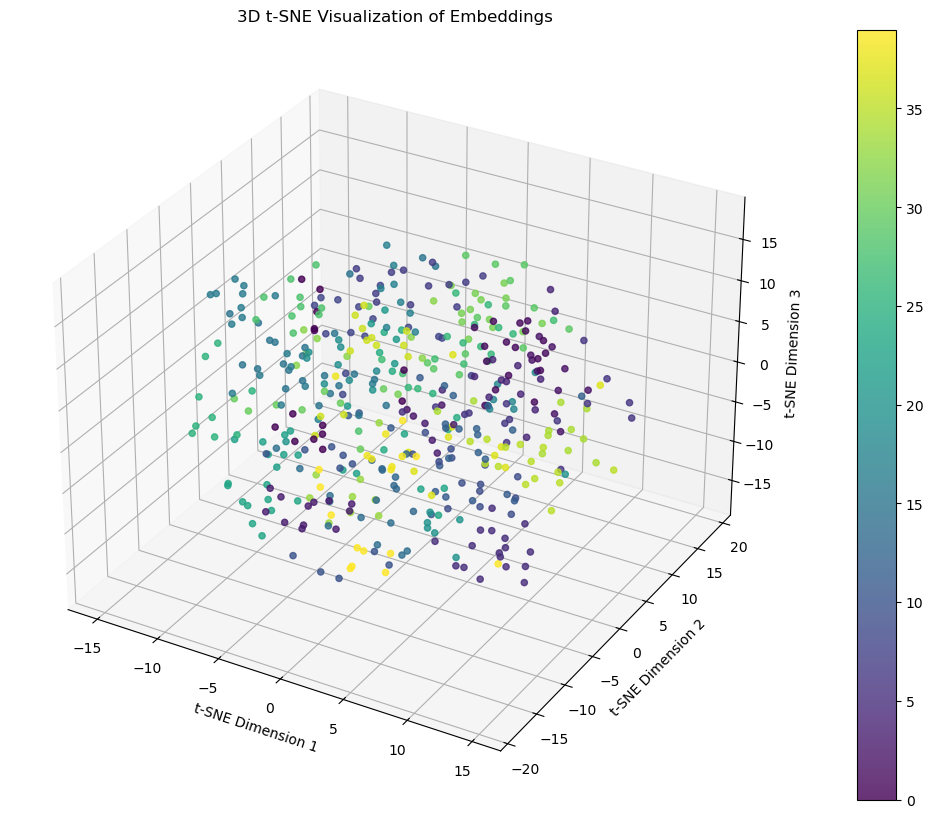

In [242]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import numpy as np
import pandas as pd

# Assuming 'sample_df' contains a column 'openai_embedding_entire' with appropriate data
embeddings = np.vstack(sample_df['openai_embedding_entire'].values)

# Apply t-SNE to the embeddings with 3 components for 3D visualization
tsne = TSNE(n_components=3, perplexity=100, n_iter=250)
tsne_results = tsne.fit_transform(embeddings)

# Plotting the t-SNE result with labels in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    tsne_results[:, 2],
    c=sample_df['cluster_label'],
    cmap='viridis',  # Viridis is a good perceptually-uniform colormap for distinguishing clusters
    alpha=0.8
)

# Adding labels and title
ax.set_title('3D t-SNE Visualization of Embeddings')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
fig.colorbar(scatter)

# Show the plot
plt.show()


In [155]:
sample_df

,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,headquarters region,...,Tasks/Jobs,Industry,People Using Tool,openai_embedding_entire,cluster_label,generated_cluster_label,new_cluster_index,openai_embedding_industry,task_list,Industry Cluster
0,Semilla Co. (Flou / Seed Academy),1-10,2023-02-01,"Semilla Co. (""Seed"") is building the future of...","Consumer Software, Content Creators, EdTech, L...","Fort Lauderdale, Florida, United States",Building the future of the music and entertain...,"43,978",33316,"Greater Miami Area, East Coast, Southern US",...,"Music Business Management, Marketing, Business...",Music Industry,"Music Creators, Entrepreneurs","[-0.004338318016380072, -0.021966977044939995,...",33,Music and Audio Production Tools,37,"[0.026692301034927368, 0.013956104405224323, -...","[Music Business Management, Marketing, Busin...",Music Industry
1,SONOTELLER,1-10,2023-02-01,SONOTELLER is an AI engine capable of 'listeni...,"Artificial Intelligence (AI), Music, SaaS, Sof...","Madrid, Madrid, Spain",SaaS AI music and lyrics analysis,"240,839",28005,"European Union (EU), Europe, Middle East, and ...",...,"Music analysis, Playlist creation, Music disco...",Music technology,"Music enthusiasts, Music professionals","[-0.012888072989881039, -0.0282617025077343, -...",33,Music and Audio Production Tools,37,"[-0.01105504296720028, -0.008627908304333687, ...","[Music analysis, Playlist creation, Music di...",Music Industry
2,AISong,1-10,2024-03-01,AISong.Fun is a platform that uses the AI to p...,"Artificial Intelligence (AI), Music",—,"Free AI Song, Music & Lyrics Generator",—,—,—,...,"Song composition, Music production, Lyrics gen...",Music creation,"Artists, Creators, Musicians","[0.005447404459118843, -0.03911559656262398, -...",33,Music and Audio Production Tools,37,"[-0.012054158374667168, -0.043048035353422165,...","[Song composition, Music production, Lyrics ...",Music Industry
3,SoundAI,1-10,2023-04-17,—,"Artificial Intelligence (AI), Information Tech...","Dubai, Dubai, United Arab Emirates",is an artificial intelligence service that is ...,"330,604",—,"Europe, Middle East, and Africa (EMEA), Gulf C...",...,"Music generation, Sound design, Audio mixing, ...",Music production,"Musicians, Producers","[-0.0040488275699317455, -0.010498875752091408...",33,Music and Audio Production Tools,37,"[-0.008610591292381287, -0.0062893228605389595...","[Music generation, Sound design, Audio mixin...",Music Industry
4,Transposed AI,1-10,2023-05-01,"Make music, Faster. Meet best-in-class GenAI b...","Audio Recording and Production, Generative AI,...","Lewes, Delaware, United States",Best-in-class GenAI blended with legal licensi...,"320,117",19958,"East Coast, Southern US",...,"Vocal sample licensing, Sound design, Music pr...",Music production,"Musicians, Producers","[-0.005211828742176294, -0.014511366374790668,...",33,Music and Audio Production Tools,37,"[-0.01398790255188942, -0.018124541267752647, ...","[Vocal sample licensing, Sound design, Music...",Music Industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Dreamrunner Labs,1-10,2023-05-01,From immersive and innovative games to advance...,"Artificial Intelligence (AI), Software, Video ...","Austin, Texas, United States",From innovative games to advanced development ...,"401,520",78754,Southern US,...,"Game development, AI integration, Level design...",Gaming,"Game developers, engineers","[-0.009000176563858986, 0.0003829324268735945,...",25,Animation and Visual Effects Tools,36,"[-0.003117440501227975, 0.023980310186743736, ...","[Game development, AI integration, Level des...",Gaming
464,2 Dude Studios,1-10,2023-03-01,2 Dude Studios is a immersive technology studi...,"Artificial Intelligence (AI), Augmented Realit...","Delhi, Delhi, India","Develop games, AR & VR apps","559,749",110032,Asia-Pacific (APAC),...,"Game development, AR/VR application developmen

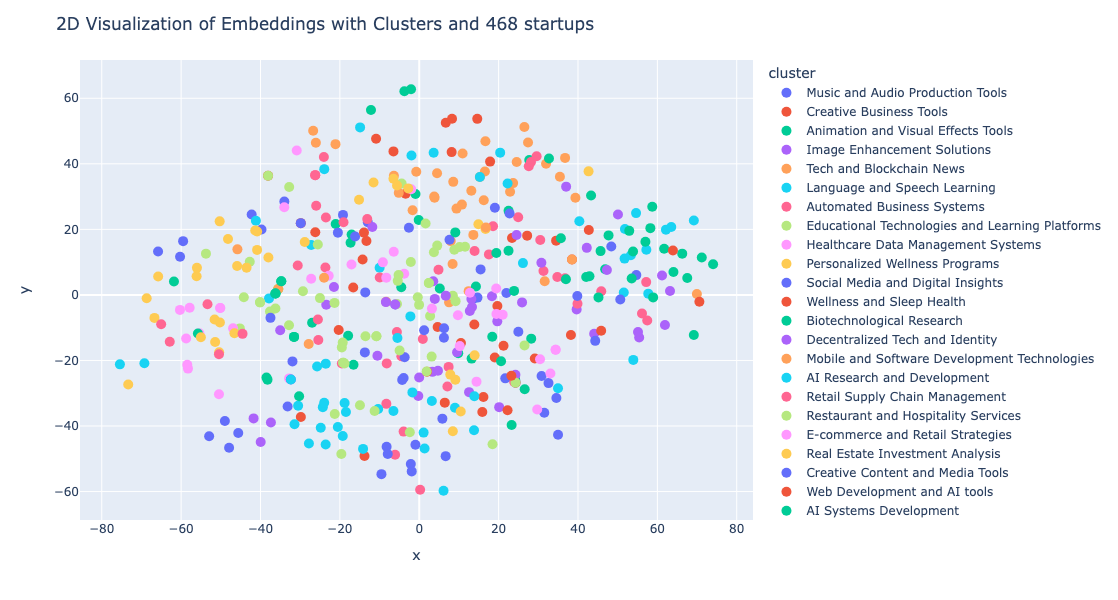

In [224]:
embeddings = np.vstack(sample_df['openai_embedding_industry'].values)

# Apply t-SNE to the embeddings with 3 components for 3D visualization
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)

# Prepare DataFrame for Plotly
plot_df = pd.DataFrame(tsne_results[:, [0,1]], columns=['x', 'y'])
plot_df['cluster'] =sample_df["generated_cluster_label"]
plot_df['generated_cluster_label'] = sample_df["generated_cluster_label"] #+ " XX " + sample_df['Tasks/Jobs']
# Plot using Plotly with clusters
fig = px.scatter(plot_df, x='x', y='y',
                 color='cluster',
                 hover_data=['generated_cluster_label'])
fig.update_traces(marker_size=10)
fig.update_layout(
    title=f"2D Visualization of Embeddings with Clusters and {len(sample_df)} startups", 
    hovermode='closest',
    width=1000,  # Set the width of the figure
    height=600  # Set the height of the figure
)
fig.show()


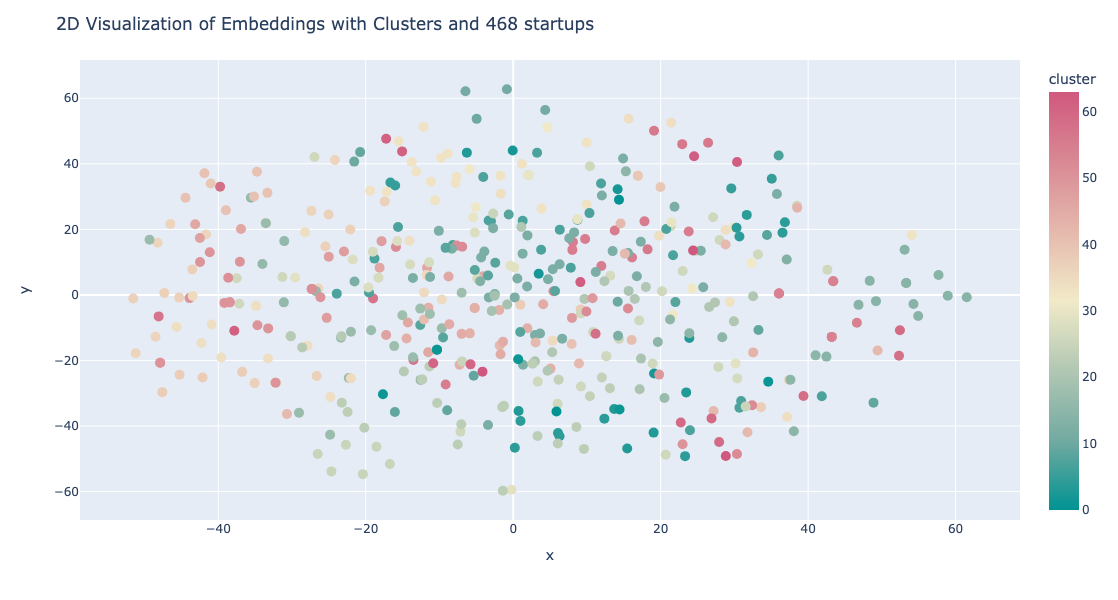

In [235]:
# Prepare DataFrame for Plotly
plot_df = pd.DataFrame(tsne_results[:, [2,1]], columns=['x', 'y'])
plot_df['cluster'] =sample_df["new_cluster_index"]
plot_df['generated_cluster_label'] = sample_df["generated_cluster_label"] + " XX " + sample_df['Tasks/Jobs']
# Plot using Plotly with clusters
fig = px.scatter(plot_df, x='x', y='y',
                 color='cluster',
                 color_continuous_scale=px.colors.diverging.Tealrose,
                 hover_data=['generated_cluster_label'])
fig.update_traces(marker_size=10)
fig.update_layout(
    title=f"2D Visualization of Embeddings with Clusters and {len(sample_df)} startups", 
    hovermode='closest',
    width=1000,  # Set the width of the figure
    height=600  # Set the height of the figure
)
fig.show()


In [186]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the number of neighbors
n_neighbors = 7

# Create a KNN model for connectivity based on cosine distance
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn.fit(embeddings)
connectivity_matrix = knn.kneighbors_graph(tsne_results, mode='connectivity')

# Use Spectral Clustering with the connectivity matrix defined by KNN
clustering = SpectralClustering(n_clusters=40, affinity='precomputed', assign_labels='kmeans', random_state=42)
cluster_labels = clustering.fit_predict(connectivity_matrix)

# Assign cluster labels back to the original DataFrame
sample_df['cluster_label'] = cluster_labels


,x,y,cluster,generated_cluster_label
0,-22.878170,-44.216789,37,Music and Audio Production Tools XX Music Busi...
1,25.234364,-39.303425,37,Music and Audio Production Tools XX Song compo...
2,21.291243,-46.000492,37,Music and Audio Production Tools XX Music gene...
3,18.102697,-40.857487,37,Music and Audio Production Tools XX Vocal samp...
4,62.089512,-11.864592,37,Music and Audio Production Tools XX Podcast di...
...,...,...,...,...
463,-36.204346,35.609383,25,Venture Capital and Financing XX Investment an...
464,-37.947903,42.597343,25,Venture Capital and Financing XX Financial ana...
465,-35.967499,35.010201,25,Venture Capital and Financing XX Startup scout...
466,-30.416529,42.116165,25,Venture Capital and Financing XX Portfolio man...


In [120]:
fig.write_html("startups.html")

In [106]:
len(sample_df)

468

In [270]:
sorted_generated_labels.head()

,new_cluster_index,generated_cluster_label
0,0,AI Research & Development
1,1,AI Development & Deployment
2,2,AI Development & Assurance
3,3,AI Tool Ecosystem
4,4,AI Automation & No-Code Platform


In [73]:
for i in range(0,1):
    vals = sample_df[(sample_df["new_cluster_index"]==1) | (sample_df["generated_cluster_label"]=="x")]
    if len(vals) < 0: continue
    label = vals.generated_cluster_label.iloc[0]
    print(f"Processing {i} and {label}:\n************************\n")
    for index, row in vals.iterrows():
        print(f"Organization Name: {row['organization name']}")
        print(f"Generated Description: {row['generated_description']}")
        print(f"Generated Description: {row['parsed_description']}\n")
    print(f"************************\n\n")

Processing 0 and AI Research and Development:
************************

Organization Name: Synthine
Generated Description: Synthine is an AI research lab dedicated to developing and applying deep generative AI solutions to create robust interfaces. Their focus lies in practical generative technologies, aiming to revolutionize the way we interact with AI systems.
Generated Description: 
Tasks/Jobs: AI interface design, Generative model development, User interaction design, AI system optimization 
Industry: AI Research
People Using Tool: AI researchers, Developers
 


Organization Name: SuperDuperDB
Generated Description: SuperDuperDB is a platform that simplifies the process of building AI applications by allowing users to integrate AI and vector search directly with their databases, eliminating the need for complex pipelines and specialized vector databases. It supports real-time inference and model training using Python, making AI integration more accessible and efficient.
Generated D

In [56]:
grouped_counts = sample_df.groupby("new_cluster_index").aggregate({
    'generated_cluster_label': 'first', 
    'organization name': 'count'        
}).rename({"organization name":"count"},axis=1)
grouped_counts

,generated_cluster_label,count
new_cluster_index,,
1,AI Research and Development,22
2,AI Toolset for Developers,11
3,Web Development and AI tools,6
4,Development Tools Automation,3
5,AI Systems Development,37
...,...,...
60,Image Enhancement Solutions,7
61,Insurance Management Services,2
62,Personal Growth and Development,3


In [57]:
for index, row in grouped_counts.iterrows():
    print(f"{row['generated_cluster_label']}, Count: {row['count']}")
    

AI Research and Development, Count: 22
AI Toolset for Developers, Count: 11
Web Development and AI tools, Count: 6
Development Tools Automation, Count: 3
AI Systems Development, Count: 37
No-Code AI Platforms, Count: 3
Advanced Cybersecurity Solutions, Count: 12
Data Management and Quality Control, Count: 8
Tech and Blockchain News, Count: 5
Social Media and Digital Insights, Count: 12
Social Media and Marketing Strategies, Count: 5
Marketing Data Analytics, Count: 3
Customer Data Analysis, Count: 4
Sales and Marketing Outreach, Count: 11
AI-Driven Business Strategies, Count: 5
Financial Management Systems, Count: 17
Tax and Accounting Automation, Count: 3
Automated Business Systems, Count: 28
E-commerce and Retail Strategies, Count: 7
E-commerce Management, Count: 4
Retail Supply Chain Management, Count: 5
Industrial Sourcing Solutions, Count: 4
Industrial Sales Automation, Count: 3
Solutions for Industrial Automation, Count: 3
Mobile and Software Development Technologies, Count: 21
C

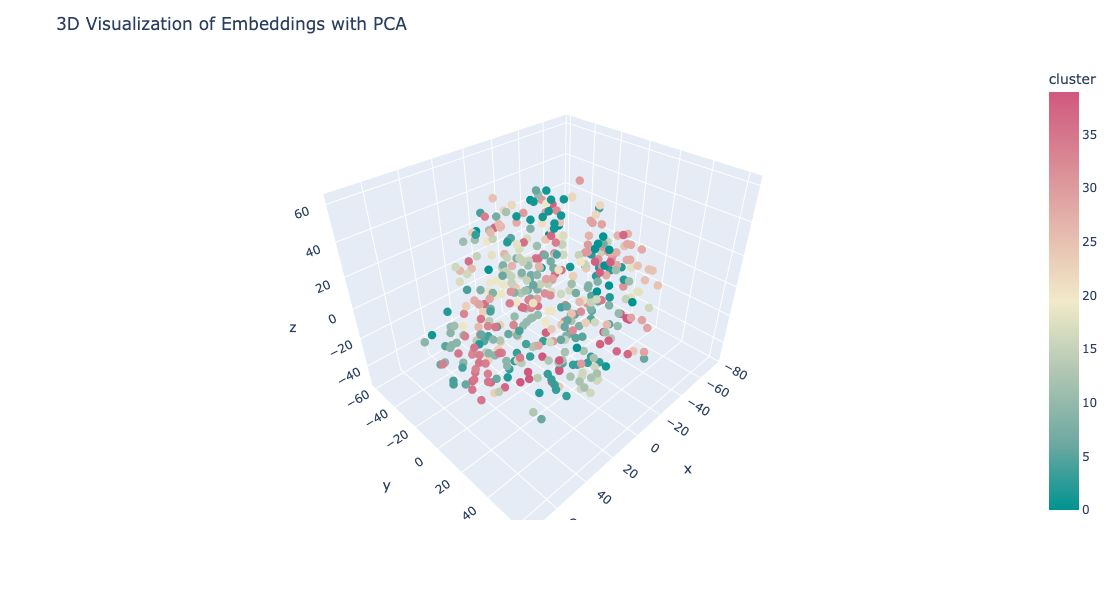

In [232]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

clusters = sample_df["generated_cluster_label"]

# Use PCA to reduce dimensions to 3 for 3D visualization
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(np.array(sample_df['openai_embedding_entire'].tolist()))

# Prepare DataFrame for Plotly
plot_df = pd.DataFrame(tsne_results, columns=['x', 'y', 'z'])
plot_df['cluster'] =sample_df["cluster_label"]
plot_df['generated_cluster_label'] = sample_df["generated_cluster_label"] + " XX " + sample_df['Tasks/Jobs']

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(plot_df, x='x', y='y', z='z', 
                 color='cluster',
                 color_continuous_scale=px.colors.diverging.Tealrose,
                 hover_data=['generated_cluster_label'])
fig.update_traces(marker_size=5)
fig.update_layout(
    title='3D Visualization of Embeddings with PCA',
    hovermode='closest',
    width=1000,  # Set the width of the figure
    height=600  # Set the height of the figure
)
# Show the plot
fig.show()


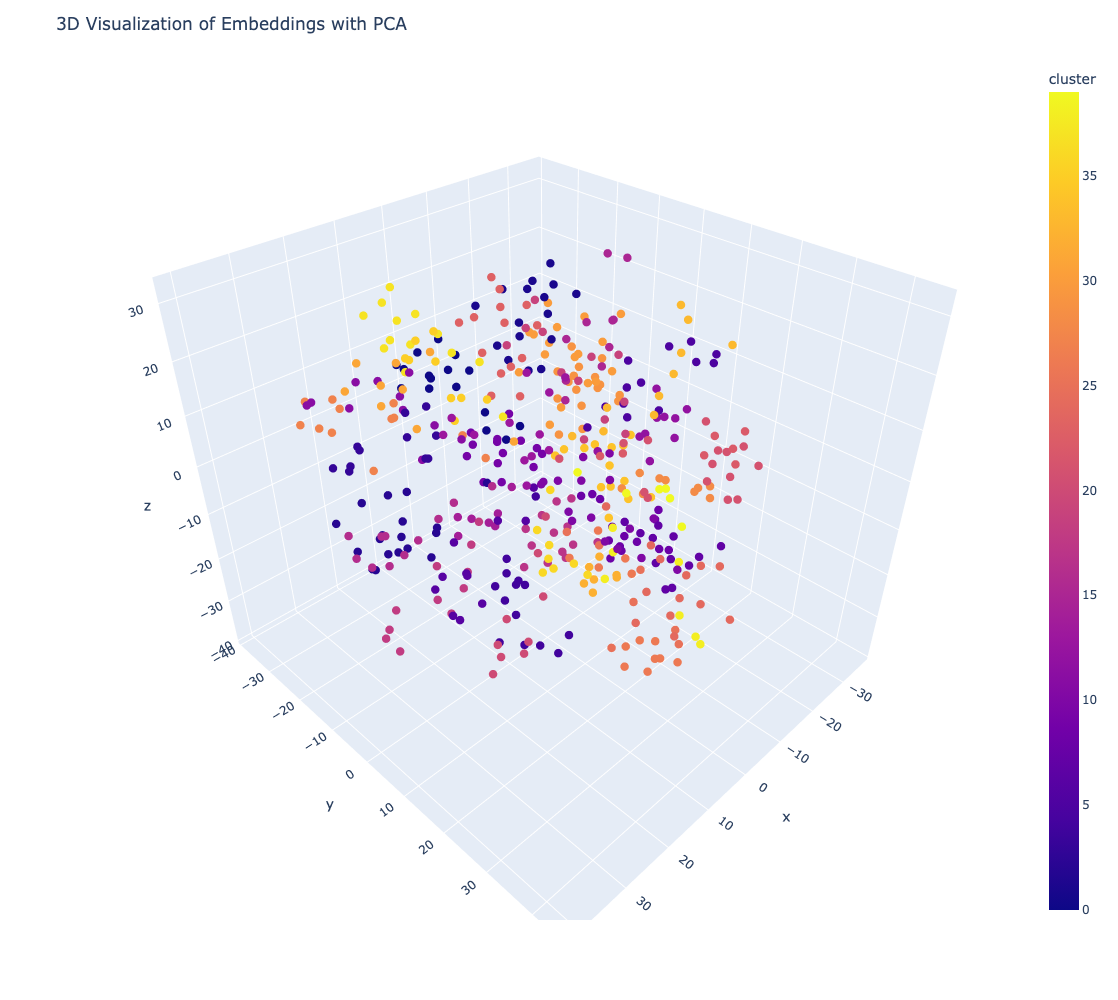

In [191]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

clusters = sample_df["cluster_label"]

# Use PCA to reduce dimensions to 3 for 3D visualization
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(np.array(sample_df['openai_embedding_entire'].tolist()))

# Prepare DataFrame for Plotly
plot_df = pd.DataFrame(tsne_results, columns=['x', 'y', 'z'])
plot_df['cluster'] = clusters  # Add cluster assignments to the DataFrame

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(plot_df, x='x', y='y', z='z', color='cluster', hover_data=['cluster'])
fig.update_traces(marker_size=5)
fig.update_layout(
    title='3D Visualization of Embeddings with PCA',
    hovermode='closest',
    width=1000,  # Set the width of the figure
    height=1000  # Set the height of the figure
)
# Show the plot
fig.show()


In [221]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Define the number of neighbors
n_neighbors = 3

# Create a KNN model for connectivity based on cosine distance
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn.fit(data)
connectivity_matrix = knn.kneighbors_graph(data, mode='connectivity')
clustering = SpectralClustering(n_clusters=10, affinity='precomputed', assign_labels='kmeans', random_state=42)
cluster_labels = clustering.fit_predict(connectivity_matrix)

# Assign cluster labels back to the original DataFrame
grouped_clusters['cluster_label'] = cluster_labels


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning:

Array is not symmetric, and will be converted to symmetric by average with its transpose.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
sample_df[['t1','t2','t3']] = tsne_results
grouped_clusters = sample_df.groupby("generated_cluster_label").aggregate({'t1':'mean','t2':'mean','t3':'mean'})
data = np.array(grouped_clusters[['t1','t2','t3']])

In [222]:
sorted_labels = list(grouped_clusters.sort_values("cluster_label").reset_index().generated_cluster_label)
if "new_cluster_index" in sample_df.columns:
    sample_df = sample_df.drop(columns=["new_cluster_index"])

#sorted_generated_labels = pd.DataFrame({"generated_cluster_label": sorted_labels.split("\n\n")}).reset_index().rename({"index":"new_cluster_index"},axis=1)
sample_df = sample_df.merge(sorted_generated_labels, on="generated_cluster_label")
sample_df.new_cluster_index


0      37
1      37
2      37
3      37
4      37
       ..
463    48
464    48
465    61
466    61
467    61
Name: new_cluster_index, Length: 468, dtype: int64

In [231]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = np.array(sample_df[['t1','t2','t3']])
# Define the number of neighbors
n_neighbors = 5

# Create a KNN model for connectivity based on cosine distance
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn.fit(data)
connectivity_matrix = knn.kneighbors_graph(data, mode='connectivity')
clustering = SpectralClustering(n_clusters=40, affinity='precomputed', assign_labels='kmeans', random_state=42)
cluster_labels = clustering.fit_predict(connectivity_matrix)

# Assign cluster labels back to the original DataFrame
sample_df['cluster_label'] = cluster_labels


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning:

Array is not symmetric, and will be converted to symmetric by average with its transpose.



In [288]:
services_mapping = {
    "AI Research & Development": [
        "AI Research & Development",
        "AI Development & Deployment",
        "AI Development & Assurance",
        "AI Tool Ecosystem",
        "AI Automation & No-Code Platform"
    ],
    "Creative and Media": [
        "Fashion",
        "Music Production & Creation Tools",
        "Tools for Creative & Business",
        "Content Creation & Audio Tools",
        "Design & Marketing",
        "Animation & VFX Production Tools"
    ],
    "Software and Web Development": [
        "Website & Software Optimization",
        "Mobile & Software Development",
        "Dev Tools & Automation",
        "DevOps & Infrastructure Management"
    ],
    "Tech News and Insights": [
        "Web3 & Tech News Automation",
        "Social & Digital Insights"
    ],
    "Retail and Commerce": [
        "Retail Operations & Supply Chain Management",
        "Retail & E-commerce",
        "E-commerce Operations & Management",
        "Industrial Procurement & Sourcing"
    ],
    "Cybersecurity": [
        "Cybersecurity Platform",
        "Cybersecurity & Data Privacy Automation"
    ],
    "Business Solutions": [
        "Tech & Business Solutions",
        "AI & Business",
        "AI Business Solutions",
        "Business Solutions",
        "Business Automation & Analytics",
        "Financial Management & Analytics",
        "Sales Automation for Industrial Equipment",
        "Accounting & Tax Automation",
        "Financial Risk & Compliance"
    ],
    "Marketing and Customer Management": [
        "Marketing Automation & Analytics",
        "Social Media Marketing Suite",
        "Customer Intelligence & Growth",
        "Customer Engagement & Automation",
        "Customer & Business Support",
        "AI Content & Marketing Tools"
    ],
    "Legal and Compliance": [
        "Construction Workflow Automation",
        "Legal Tech Automation",
        "Legal Client Management",
        "Compliance & Risk Management",
        "Document Automation for Business"
    ],
    "Education and Learning": [
        "EdTech & Learning",
        "Educational Gamification & Assessment",
        "Learning & Development Platforms",
        "Speech & Language Learning"
    ],
    "Healthcare": [
        "Healthcare Data & Management",
        "Healthcare Operations & Workflow",
        "Clinical AI Assistant",
        "Personalized Health & Wellness",
        "Mental Wellness & Therapy"
    ],
    "Hospitality": [
        "Restaurant & Hospitality Automation",
        "Hospitality & Travel Operations"
    ],
    "Travel and Booking": [
        "Travel Planning & Booking"
    ],
    "AI Resources": [
        "AI Resources & Education"
    ],
    "Venture and Non-profit": [
        "Venture Capital Operations",
        "Non-profit & Sustainability Solutions"
    ],
    "Wellness and Lifestyle": [
        "Sleep & Dream Wellness",
        "Personal & Professional Growth"
    ],
    "Recruitment and HR": [
        "Recruitment & HR Automation",
        "Job Search & Career Development Tools"
    ],
    "Real Estate": [
        "Real Estate & Investment Analytics",
        "Real Estate & Trust & Safety Automation",
        "Home Design & Visualization"
    ],
    "Data Management": [
        "Data Analysis & Insights",
        "Data Quality & Management",
        "Market Research & Business Strategy"
    ],
    "Management and Operations": [
        "Team & Project Management",
        "Proposal & Technical Writing Automation"
    ],
    "Innovative Technologies": [
        "Decentralized Technologies & Digital Identity",
        "High-Performance Computing"
    ],
    "Insurance and Support": [
        "Insurance Management & Support"
    ],
    "Biotech": [
        "Biotech Research & Development"
    ],
    "Industry Solutions": [
        "Industrial Automation Solutions"
    ],
    "Event and Social Tools": [
        "Social & Event Tools"
    ]
}

vals = []
for x in services_mapping:
    for y in services_mapping[x]:
        vals.append([x, y])
merged_labels = pd.DataFrame(vals, columns=["merged_label", "generated_cluster_label"])


In [289]:
for i in range(0,1):
    vals = sample_df[(sample_df["new_cluster_index"]==1000) | (sample_df["generated_cluster_label"]=="AI & Business")]
    if len(vals) == 0: continue
    label = vals.generated_cluster_label.iloc[0]
    print(f"Processing {i} and {label}:\n************************\n")
    for index, row in vals.iterrows():
        print(f"Organization Name: {row['organization name']}")
        print(f"Generated Description: {row['generated_description']}")
        print(f"Generated Description: {row['parsed_description']}\n")
    print(f"************************\n\n")

Processing 0 and AI & Business:
************************

Organization Name: FoundationFlow
Generated Description: FoundationFlow is a B2B platform that streamlines the deployment of generative AI business workflows, offering a cost-effective and secure solution for managing multi-modal LLMs. With advanced capabilities, it significantly reduces both the computational and memory requirements for training, leading to an average total cost of ownership reduction by 60%.
Generated Description: 
Tasks/Jobs: Generative AI workflow deployment, LLM management, Multi-modal LLM training, Cost optimization
Industry: Business automation
People Using Tool: Businesses, Developers
 


Organization Name: CloudGPT
Generated Description: CloudGPT is an innovative AI company providing cloud-based solutions powered by advanced generative pre-trained transformer (GPT) technology, specializing in natural language processing, machine learning, and data analytics. Their scalable platform is designed to serve 

In [290]:
merged_labels.merged_label.unique()

array(['AI Research & Development', 'Creative and Media',
       'Software and Web Development', 'Tech News and Insights',
       'Retail and Commerce', 'Cybersecurity', 'Business Solutions',
       'Marketing and Customer Management', 'Legal and Compliance',
       'Education and Learning', 'Healthcare', 'Hospitality',
       'Travel and Booking', 'AI Resources', 'Venture and Non-profit',
       'Wellness and Lifestyle', 'Recruitment and HR', 'Real Estate',
       'Data Management', 'Management and Operations',
       'Innovative Technologies', 'Insurance and Support', 'Biotech',
       'Industry Solutions', 'Event and Social Tools'], dtype=object)

In [291]:
if "merged_label" in sample_df.columns:
    sample_df = sample_df.drop(columns="merged_label")
sample_df = sample_df.merge(merged_labels, on="generated_cluster_label")
sample_df.head()

,Unnamed: 0.1,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,...,Company,parsed_description,Tasks/Jobs,Industry,People Using Tool,openai_embedding_entire,cluster_label,generated_cluster_label,new_cluster_index,merged_label
0,1,18944,Semilla Co. (Flou / Seed Academy),1-10,2023-02-01,"Semilla Co. (""Seed"") is building the future of...","Consumer Software, Content Creators, EdTech, L...","Fort Lauderdale, Florida, United States",Building the future of the music and entertain...,"43,978",...,Semilla Co. (Flou / Seed Academy),"\nTasks/Jobs: Music Business Management, Marke...","Music Business Management, Marketing, Business...",Music Industry,"Music Creators, Entrepreneurs","[-0.004338318016380072, -0.021966977044939995,...",33,Music Production & Creation Tools,25,Creative and Media
1,10,22382,NaijaBuzz300,1-10,2024-03-03,NaijaBuzz300's AI content tools helps artists ...,Marketing,"Kaduna, Kaduna, Nigeria",Helping artists grow & scale up their music ca...,—,...,NaijaBuzz300,"\nTasks/Jobs: Music production, Songwriting, M...","Music production, Songwriting, Marketing, Prom...",Music,"Musicians, Labels, Promoters","[-0.006098032463341951, -0.021988358348608017,...",33,Music Production & Creation Tools,25,Creative and Media
2,28,19022,SONOTELLER,1-10,2023-02-01,SONOTELLER is an AI engine capable of 'listeni...,"Artificial Intelligence (AI), Music, SaaS, Sof...","Madrid, Madrid, Spain",SaaS AI music and lyrics analysis,"240,839",...,SONOTELLER,"\nTasks/Jobs: Music analysis, Playlist creatio...","Music analysis, Playlist creation, Music disco...",Music technology,"Music enthusiasts, Music professionals","[-0.012888072989881039, -0.0282617025077343, -...",33,Music Production & Creation Tools,25,Creative and Media
3,82,22374,AISong,1-10,2024-03-01,AISong.Fun is a platform that uses the AI to p...,"Artificial Intelligence (AI), Music",—,"Free AI Song, Music & Lyrics Generator",—,...,AISong,"\nTasks/Jobs: Song composition, Music producti...","Song composition, Music production, Lyrics gen...",Music creation,"Artists, Creators, Musicians","[0.005447404459118843, -0.03911559656262398, -...",33,Music Production & Creation Tools,25,Creative and Media
4,126,19675,SoundAI,1-10,2023-04-17,—,"Artificial Intelligence (AI), Information Tech...","Dubai, Dubai, United Arab Emirates",is an artificial intelligence service that is ...,"330,604",...,SoundAI,"\nTasks/Jobs: Music generation, Sound design, ...","Music generation, Sound design, Audio mixing, ...",Music production,"Musicians, Producers","[-0.0040488275699317455, -0.010498875752091408...",33,Music Production & Creation Tools,25,Creative and Media


In [293]:
len(sample_df)

325